In [1]:
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np

# Load a NEON AOP image

In [20]:
neon_image= '/data/srer/NEON_D14_SRER_DP1_20190901_171112_reflectance.h5'

neon = ht.HyTools()
neon.read_file(neon_image,'neon')

# Load an ENVI image

In [2]:
envi_image= 'D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10_refl/f130612t01p00r10rdn_refl_img_corr'

anc_data = {'path_length': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 0],
 'sensor_az': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 1],
 'sensor_zn': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 2],
 'solar_az': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 3],
 'solar_zn': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 4],
 'phase': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 5],
 'slope': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 6],
 'aspect': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 7],
 'cosine_i': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 8],
 'utc_time': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 9]}

envi = ht.HyTools()
envi.read_file(envi_image,'envi',anc_path=anc_data)

Reflectance and ancillary no data extents do not match, combining no data masks.


In [3]:
neon.map_info


NameError: name 'neon' is not defined

## Examples of get methods

In [4]:
line = envi.get_line(100, corrections = [])
band = envi.get_band(10)
wave = envi.get_wave(660)
pixel = envi.get_pixels([500],[500])

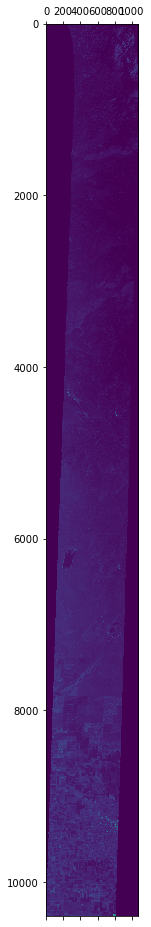

In [5]:
band = np.copy(band)
# band[~envi.mask['no_data']] = np.nan
plt.matshow(band)

### Load precomputed correction coefficients

In [5]:
topo_coeffs = 'D:/wenqu/Aviris/jason/topo_test3.json'
envi.load_coeffs(topo_coeffs,'topo')

brdf_coeffs = 'D:/wenqu/Aviris/jason/topo_test3.json'
envi.load_coeffs(brdf_coeffs,'brdf')

In [6]:
print(envi.brdf)

{'bad_bands': [[300, 400], [1337, 1430], [1800, 1960], [2450, 2600]], 'file_type': 'envi', 'input_files': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10_refl/f130612t01p00r10rdn_refl_img_corr'], 'anc_files': {'D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10_refl/f130612t01p00r10rdn_refl_img_corr': {'path_length': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 0], 'sensor_az': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 1], 'sensor_zn': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 2], 'solar_az': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 3], 'solar_zn': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 4], 'phase': ['D:/wenqu/Aviris/hytools/example_code/f130612t01p00r10rdn_e/f130612t01p00r10rdn_e_obs_ort', 5], 'slope': ['D:/wenqu/Aviris/hy

#### Function for reading from and displaying a RGB image preview

In [7]:
def show_rgb(hy_obj,r=660,g=550,b=440, correct= []):

    rgb=  np.stack([hy_obj.get_wave(r,corrections= correct),
                    hy_obj.get_wave(g,corrections= correct),
                    hy_obj.get_wave(b,corrections= correct)])
    rgb = np.moveaxis(rgb,0,-1).astype(float)
    rgb[rgb ==hy_obj.no_data] = np.nan

    bottom = np.nanpercentile(rgb,5,axis = (0,1))
    top = np.nanpercentile(rgb,95,axis = (0,1))
    rgb = np.clip(rgb,bottom,top)

    rgb = (rgb-np.nanmin(rgb,axis=(0,1)))/(np.nanmax(rgb,axis= (0,1))-np.nanmin(rgb,axis= (0,1)))

    height = int(hy_obj.lines/hy_obj.columns)

    fig  = plt.figure(figsize = (7,7) )
    plt.imshow(rgb)
    plt.show()
    plt.close()

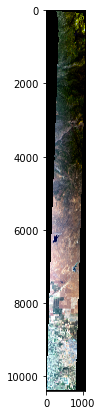

In [9]:
show_rgb(envi, correct= [])

In [8]:
show_rgb(envi, correct = ['topo'])

KeyError: 'type'

In [9]:
show_rgb(envi, correct = ['topo','brdf'])

KeyError: 'type'

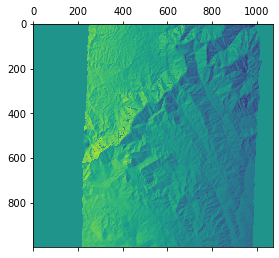

In [34]:
difference = envi.get_wave(450) - envi.get_wave(450,corrections= ['topo',
                                                                  'brdf'])
plt.matshow(difference)

## Calculate ancillary and display

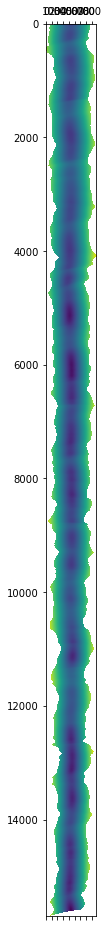

In [36]:
data = np.copy(neon.get_anc('sensor_zn', radians = False))

data[~neon.mask['no_data']] = np.nan

plt.matshow(data)

## Wavelength resampling

In [37]:
outwaves = [x for x in range(450,2500,25)]
envi.resampler = {'type': 'cubic','out_waves' :outwaves}

(0.0, 0.6)

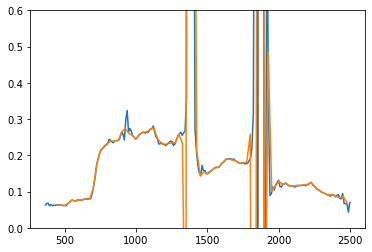

In [38]:
original = envi.get_pixels([500],[500])
resample =envi.get_pixels([500],[500], resample = True)

plt.plot(envi.wavelengths,original[0])
plt.plot(outwaves,resample[0])
plt.ylim(0,.6)